In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Churn-Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
y=y.map({0: 'Stayed', 1: 'Exited'})

In [8]:
sns.set(rc={'figure.figsize':(12,10), 'axes.labelsize':18, 
            'xtick.labelsize': 14, 'ytick.labelsize': 14})

In [9]:
sns.set_style('whitegrid')

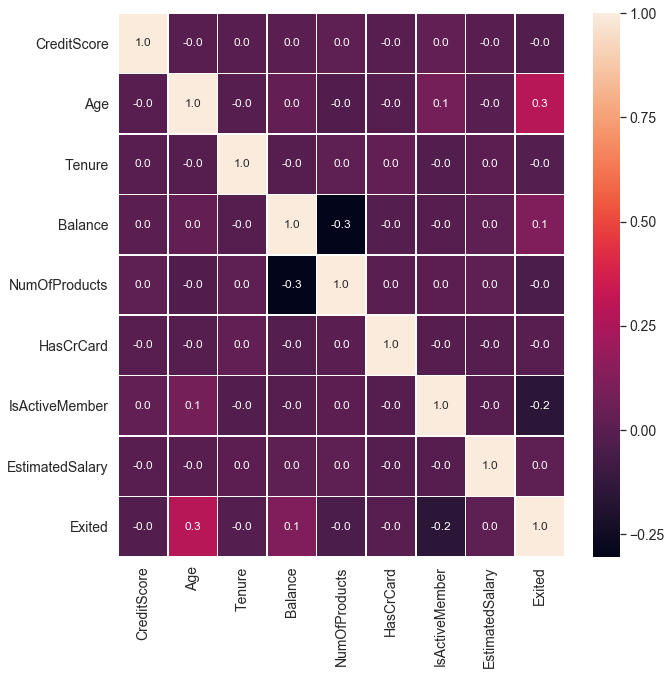

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

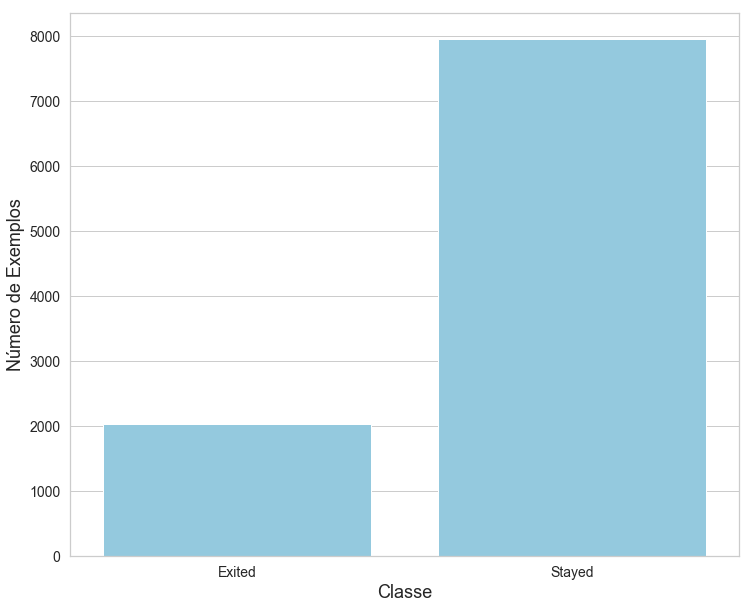

In [11]:
ax = sns.countplot(y,label="Count", color='skyblue')
ax.set(xlabel='Classe', ylabel='Número de Exemplos')
Exited, Stayed = y.value_counts()

In [12]:
data_exit = y
data = X.drop(['Gender', 'Geography'], axis=1)

data_std = ((data - data.mean())/data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

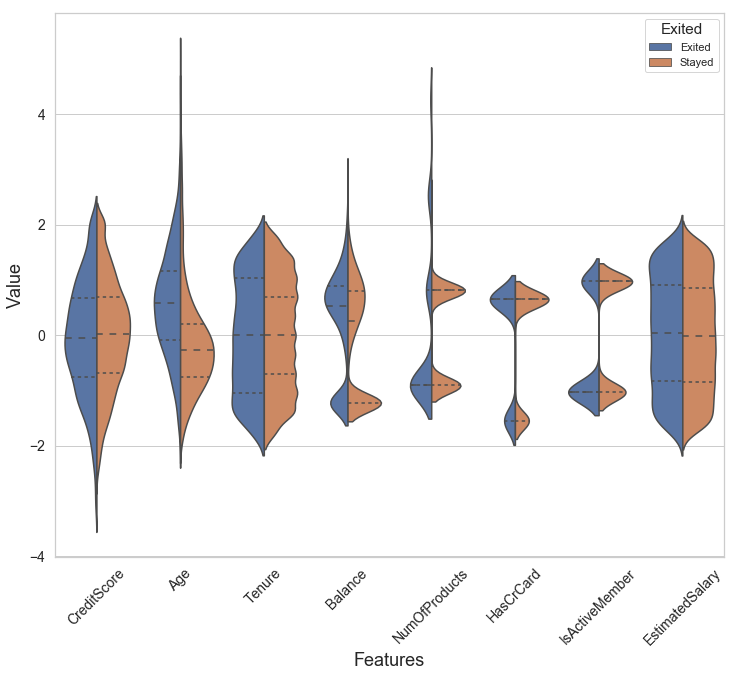

In [13]:
data = pd.concat([y, data_std.iloc[:,0:8]], axis=1)
data.rename(columns={data.columns[0]: 'Exited'}, inplace=True)

data = pd.melt(data,id_vars="Exited",
                    var_name="Features",
                    value_name='Value')

sns.violinplot(x="Features", y="Value", 
               hue="Exited", data=data,split=True, 
               inner="quart")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

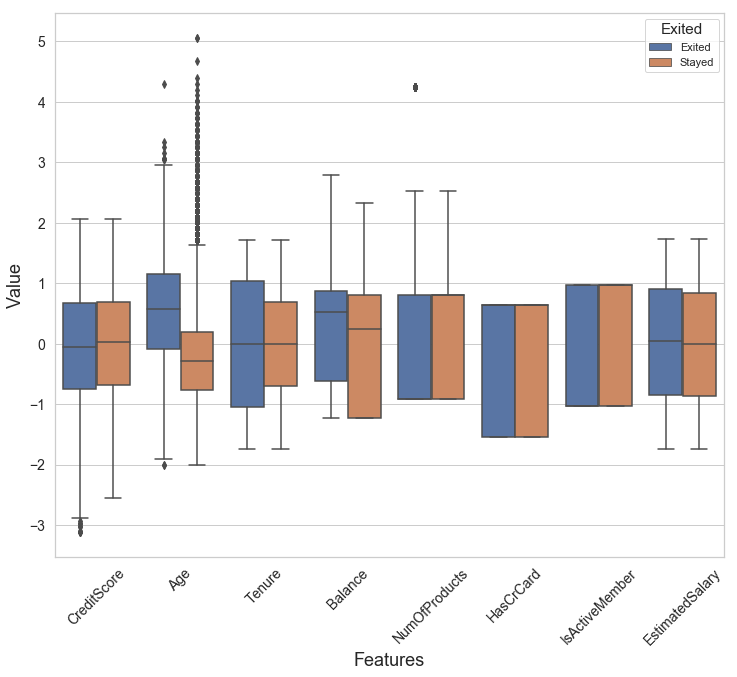

In [14]:
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data,id_vars="Exited",
                    var_name="Features",
                    value_name='Value')

sns.boxplot(x="Features", y="Value", hue="Exited", data=data)
plt.xticks(rotation=45)

C:\Users\Inventario-LSE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


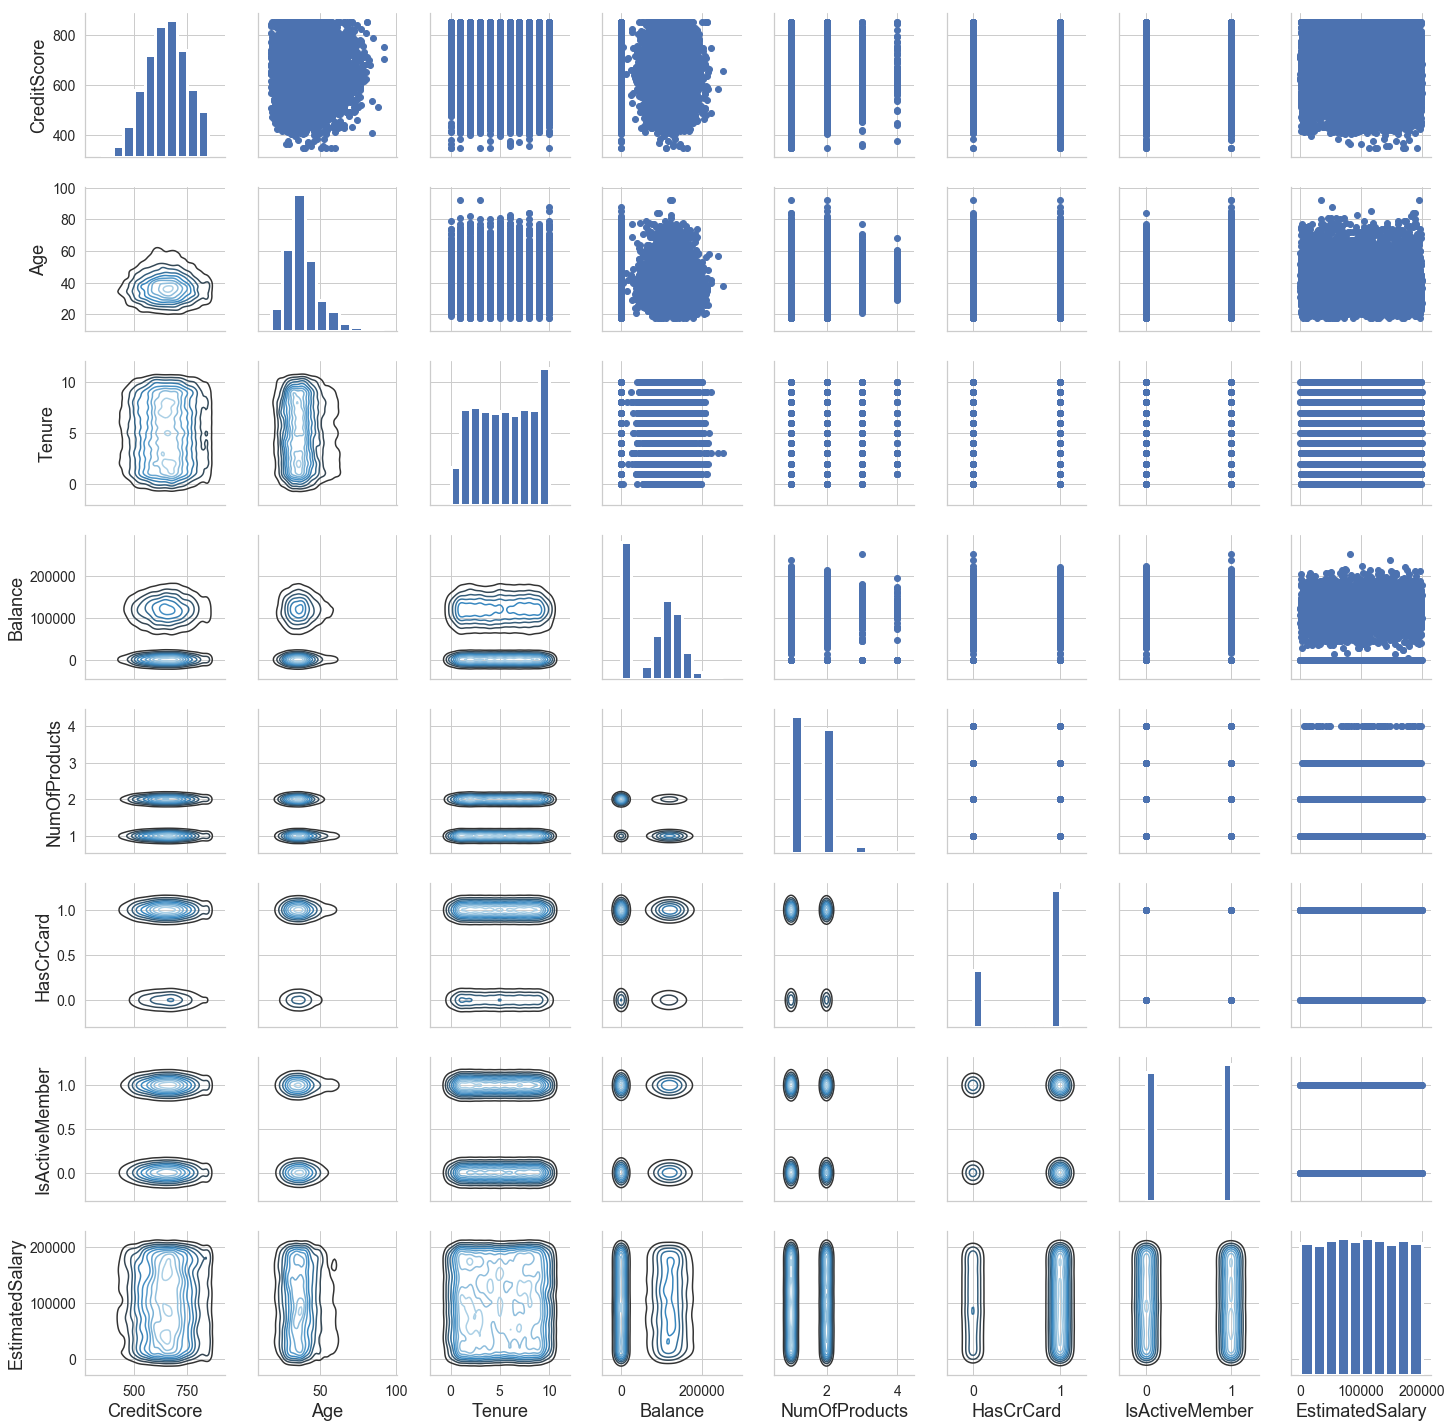

In [17]:
g = sns.PairGrid(X.drop(['Geography','Gender'], axis=1), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(plt.hist, lw=3)

KeyboardInterrupt: 

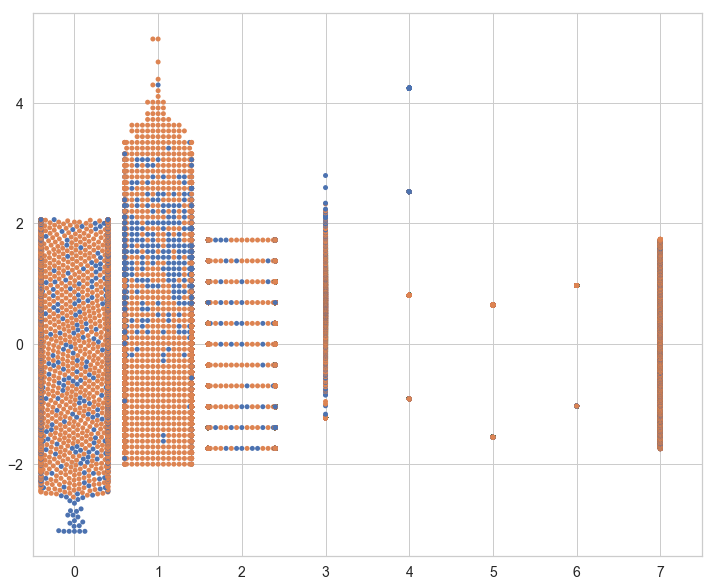

In [19]:
data = pd.concat([y, data_std.iloc[:,0:8]], axis=1)

data = pd.melt(data,id_vars="Exited",
                    var_name="Features",
                    value_name='Value')

sns.swarmplot(x="Features", y="Value", hue="Exited", data=data)